In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
import nltk
from nltk.corpus import stopwords
# from google.colab import drive
import pandas as pd
import re
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df2.dropna(axis=0,subset=['job description'], inplace=True)

Preparing the data for train test split

In [4]:
y_train=df['fake?']
df=df.drop(['fake?'],axis=1)

Preparing the data for train test split


In [5]:
y_test=df2['fake?']
df2=df2.drop(['fake?'],axis=1)

In [6]:
df.describe()

,telecommuting,company logo exist?,has_questions
count,12841.000000,12841.000000,12841.000000
mean,0.042286,0.792306,0.487423
std,0.201250,0.405672,0.499861
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


Handling missing values

In [7]:
print(df.isnull().sum())

job title                         0
office location                 259
department                     8260
salary offered for the job    10752
company information            2405
job description                   0
job requirements               1941
benefits                       5245
telecommuting                     0
company logo exist?               0
has_questions                     0
employment_type                2528
experience required            5086
education required             5853
industry                       3546
function                       4659
dtype: int64


In [8]:
df.shape

(12841, 16)

In [9]:
df =df.rename(columns={"job title": "job_title", "office location": "office_location", "salary offered for the job": "salary_offered_for_the_job", "company information": "company_information","company information": "company_information","job description": "job_description","job requirements":"job_requirements","company logo exist?":"company_logo_exist?","experience required":"experience_required","education required":"education_required"})
df2 =df2.rename(columns={"job title": "job_title", "office location": "office_location", "salary offered for the job": "salary_offered_for_the_job", "company information": "company_information","company information": "company_information","job description": "job_description","job requirements":"job_requirements","company logo exist?":"company_logo_exist?","experience required":"experience_required","education required":"education_required"})

Drop columns department,salary offered for the job,experince required and education required,office location#

In [10]:
df.drop(columns=['department','salary_offered_for_the_job','experience_required','education_required','industry'],axis=1,inplace=True)
#column with word ambiguity
df.drop(columns=['office_location'],axis=1,inplace=True)
#drop columns department,salary offered for the job,experince required and education required#
df2.drop(columns=['department','salary_offered_for_the_job','experience_required','education_required','industry'],axis=1,inplace=True)
#column with word ambiguity
df2.drop(columns=['office_location'],axis=1,inplace=True)

In [11]:
df

,job_title,company_information,job_description,job_requirements,benefits,telecommuting,company_logo_exist?,has_questions,employment_type,function
0,Videographer / Editor / Photographer,Dreamers &amp; Creators is a creative agency t...,The Videographer / Editor / Photographer will ...,Minimum 1 year experience as an videographer /...,NaN,0,1,1,Full-time,Art/Creative
1,Supply Chain Manager,Η πρώτη στεγασμένη αγορά παραγωγών με παντοπωλ...,Buyer will be in charge of expanding our vendo...,Skills required:MS-Office excellentExperience ...,In private,0,1,1,NaN,NaN
2,Digital Project Manager,ConsumerTrack is a technology-centric internet...,We are looking for a Digital Project Manager t...,2+ years of project management experience in w...,Competitive salary with excellent growth oppor...,0,1,1,NaN,NaN
3,Global Communications Manager,Founded in 2010 by a team from Google’s London...,"Qubit: Cutting Edge Big Data EngineeringQubit,...",Who You AreBy submitting your application you ...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Marketing
4,S3I Candidates,NaN,Adform is a premier partner for media agencies...,DCO Team in Kaunas:Front End Developer #URL_82...,NaN,0,1,0,Full-time,NaN
...,...,...,...,...,...,...,...,...,...,...
12836,Senior Luxury Beauty Salesperson,S5 is the first range of certified organic cos...,PURPOSEResponsible for selling skincare produc...,Minimum 2 years experience as a Beauty Consult...,NaN,0,1,0,NaN,NaN
12837,Senior Digital Account Manager,Mindworks interactive is one of the fastest gr...,Mindworks is looking for a Senior Digital Acco...,Project ManagementDefine execution methodology...,"Why Work for MindworksWe dream big. Together, ...",0,1,1,Full-time,Project Management
12838,Interior Designer,Schroeder Solutions is a full-service interior...,Schroeder Solutions is a full-service interior...,2-3 years experience in space planning and des...,Schroeder Solutions offers a competitive salar...,0,1,1,Full-time,Design
12839,.NET Developer,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN


In [12]:
# Replace missing values of these featues with no information as we cannot drop them
df['job_requirements'].fillna("Noinformation", inplace = True)
df['benefits'].fillna("Noinformation", inplace = True) 
df['company_information'].fillna("Noinformation", inplace = True)
df['function'].fillna("Noinformation", inplace = True)
# Replace missing values of these featues with no information as we cannot drop them
df2['job_requirements'].fillna("Noinformation", inplace = True)
df2['benefits'].fillna("Noinformation", inplace = True) 
df2['company_information'].fillna("Noinformation", inplace = True)
df2['function'].fillna("Noinformation", inplace = True)

In [13]:
#Replace the missing values of these columns with mode as it is suitable for categorical variables with a small number of unique values.
for column in ['employment_type']:
    df[column].fillna(df[column].mode()[0], inplace=True)
#Replace the missing values of these columns with mode as it is suitable for categorical variables with a small number of unique values.
for column in ['employment_type']:
    df2[column].fillna(df2[column].mode()[0], inplace=True)

One-hot encoding of the employment_type and function columns

In [14]:
encoded_df_emp = pd.get_dummies(df['employment_type'])
encoded_df_func = pd.get_dummies(df['function'])
df = pd.concat([df, encoded_df_emp], axis=1, join="inner")
df = pd.concat([df, encoded_df_func], axis=1, join="inner")

In [15]:
encoded_df_emp = pd.get_dummies(df2['employment_type'])
encoded_df_func = pd.get_dummies(df2['function'])
df2 = pd.concat([df2, encoded_df_emp], axis=1, join="inner")
df2 = pd.concat([df2, encoded_df_func], axis=1, join="inner")
df2.head()

,job_title,company_information,job_description,job_requirements,benefits,telecommuting,company_logo_exist?,has_questions,employment_type,function,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
0,Commercial/Industrial Construction Superintendent,Noinformation,Seeking qualified candidates for a full-time s...,Minimum five years of construction management ...,"401K, company vehicle, health, vision and dent...",0,0,1,Full-time,Management,...,0,0,0,0,0,0,0,0,0,0
1,Title Closer / Settlement Agent,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Noinformation,...,0,0,0,0,0,0,0,0,0,0
2,Back-end Developer,About the CompanyWe are ticketscript - the Eur...,About the CompanyWe are ticketscript - the Eur...,Your profileThe basics- 5+ years of experience...,Our offerA competitive salary within an intern...,0,1,0,Full-time,Information Technology,...,0,0,0,0,0,0,0,0,0,0
3,Full-time Web Developer,Noinformation,#NAME?,- Must have extensive knowledge of CMS framewo...,Noinformation,0,1,0,Full-time,Information Technology,...,0,0,0,0,0,0,0,0,0,0
4,Program Manager,"Come be a part of one of the fastest growing, ...",We are looking for a Program Manager who can h...,Desired skills…10+ years of industry experienc...,Competitive base salaryStock OptionsFull benef...,0,1,1,Full-time,Noinformation,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df2.isna().sum()

job_title                 0
company_information       0
job_description           0
job_requirements          0
benefits                  0
telecommuting             0
company_logo_exist?       0
has_questions             0
employment_type           0
function                  0
Contract                  0
Full-time                 0
Other                     0
Part-time                 0
Temporary                 0
Accounting/Auditing       0
Administrative            0
Advertising               0
Art/Creative              0
Business Analyst          0
Business Development      0
Consulting                0
Customer Service          0
Data Analyst              0
Design                    0
Distribution              0
Education                 0
Engineering               0
Finance                   0
Financial Analyst         0
General Business          0
Health Care Provider      0
Human Resources           0
Information Technology    0
Legal                     0
Management          

Now check the shape of the dataframe after cleaning the data

In [17]:
df.shape

(12841, 53)

In [18]:
def lowercase(dataframe):
    
    lowercase_dataframe = dataframe.apply(lambda x: x.lower())
    return lowercase_dataframe

In [19]:
nltk.download('stopwords')
stop_words= stopwords.words("english")
print(stop_words)
print(df.shape)
print(df.dtypes)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mostafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
url_pattren = re.compile(r'URL.*?#')
hashtag_pattren = re.compile(r"\#[^#]*\#")
def remove_url(text):
    cleaned_text = re.sub(url_pattren, ' ', text)
    return cleaned_text
def remove_hash (text):
    #cleaned_text = re.sub(url_pattren, ' ', text)
    cleaned_text = re.sub(hashtag_pattren, ' ', text)
    return cleaned_text
# apply the function to the 'text' column of the dataframe
df['company_information'] = df['company_information'].apply(str)
df['company_information'] = df['company_information'].apply(remove_hash)

df['job_description'] = df['job_description'].apply(str)
df['job_description'] = df['job_description'].apply(remove_hash)

df['job_requirements'] = df['job_requirements'].apply(str)
df['job_requirements'] = df['job_requirements'].apply(remove_hash)

df['benefits'] = df['benefits'].apply(str)
df['benefits'] = df['benefits'].apply(remove_hash)

applying the function to df2

In [21]:
df2['company_information'] = df2['company_information'].apply(str)
df2['company_information'] = df2['company_information'].apply(remove_hash)

df2['job_description'] = df2['job_description'].apply(str)
df2['job_description'] = df2['job_description'].apply(remove_hash)

df2['job_requirements'] = df2['job_requirements'].apply(str)
df2['job_requirements'] = df2['job_requirements'].apply(remove_hash)

df2['benefits'] = df2['benefits'].apply(str)
df2['benefits'] = df2['benefits'].apply(remove_hash)

In [22]:
special_pattern = re.compile(r"[^a-zA-Z ]")
#this function is to clean teaxt 
def remove_characters(text):
    cleaned_text = re.sub(special_pattern, ' ', text)
    return cleaned_text

# apply the function to the 'text' column of the dataframe
df['company_information'] = df['company_information'].apply(str)
df['company_information'] = df['company_information'].apply(remove_characters)

df['job_description'] = df['job_description'].apply(str)
df['job_description'] = df['job_description'].apply(remove_characters)

df['job_requirements'] = df['job_requirements'].apply(str)
df['job_requirements'] = df['job_requirements'].apply(remove_characters)

df['benefits'] = df['benefits'].apply(str)
df['benefits'] = df['benefits'].apply(remove_characters)

In [23]:
#removing special characters from df2
# apply the function to the 'text' column of the dataframe
df2['company_information'] = df2['company_information'].apply(str)
df2['company_information'] = df2['company_information'].apply(remove_characters)

df2['job_description'] = df2['job_description'].apply(str)
df2['job_description'] = df2['job_description'].apply(remove_characters)

df2['job_requirements'] = df2['job_requirements'].apply(str)
df2['job_requirements'] = df2['job_requirements'].apply(remove_characters)

df2['benefits'] = df2['benefits'].apply(str)
df2['benefits'] = df2['benefits'].apply(remove_characters)

In [24]:
#df.to_csv('finalalaa2.csv')

In [25]:
#combine columns in all info colomn
all_info =df[['job_title','company_information','job_description','job_requirements','benefits']].agg(' '.join, axis=1)
df['all_info']=all_info
# #combine columns in all info colomn
all_info =df2[['job_title','company_information','job_description','job_requirements','benefits']].agg(' '.join, axis=1)
df2['all_info']=all_info

Convert all letters to lower case 

In [26]:
df["all_info"].str.lower()
df2["all_info"].str.lower()

0       commercial/industrial construction superintend...
1       title closer / settlement agent network closin...
2       back-end developer about the companywe are tic...
3       full-time web developer noinformation  name   ...
4       program manager come be a part of one of the f...
                              ...                        
3193    mortgage loan coordinator proficio mortgage is...
3194    cruise staff wanted *urgent* noinformation    ...
3195    full-time caregiver for a hip young man united...
3196    assistant manager noinformation westview finan...
3197    sales executive/business development manager -...
Name: all_info, Length: 3197, dtype: object

In [27]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mostafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mostafa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Tokenizing and lemmetizing train dataset

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [31]:
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    text_only_alphabets = [t for t in words if t.isalpha()]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text_only_alphabets if word.lower() not in set(stopwords.words('english'))]
    return ' '.join(lemmatized_words)

In [32]:
df['all_info']  = df['all_info'].apply(lemmatize_text)

In [33]:
df2['all_info']  = df2['all_info'].apply(lemmatize_text)

In [34]:
df2['all_info'].head(20)

0     Construction Superintendent Noinformation Seek...
1     Title Closer Settlement Agent Network Closing ...
2     Developer CompanyWe ticketscript European mark...
3     Web Developer Noinformation NAME Must extensiv...
4     Program Manager Come part one fastest growing ...
5     Big Data Technologies Snr Dev Adthena UK leadi...
6     Global Social Media Marketing Manager Luxy Hai...
7     Product Design Internship Frustrated status qu...
8     min Veteran Interview gift card Noinformation ...
9     Data Entry Noinformation Welcome one toughest ...
10    Group Accountant Head Accounting Noinformation...
11    E IC Engineer Noinformation Job incumbent resp...
12    Business Intelligence BI Developer WORK IMAGIN...
13    Public Relations Coordinator Noinformation loo...
14    Product Manager NZ EROAD established modernise...
15    Business Development Manager Wiredrive fast gr...
16    Human Centered Industrial Designer Boston Cons...
17    Data Quality Lead Vend looking awesome new

In [39]:
df.drop(columns=['job_title','company_information','job_description','job_requirements','benefits','employment_type','function'],axis=1,inplace=True)
df2.drop(columns=['job_title','company_information','job_description','job_requirements','benefits','employment_type','function'],axis=1,inplace=True)

In [40]:
df_train = pd.concat([df, y_train], axis=1)

In [41]:
df_train.to_csv('df_train.csv')

In [42]:
df_test = pd.concat([df2, y_test], axis=1)

In [43]:
df_test.to_csv('df_test.csv')

In [75]:
df['all_info']

0        Videographer / Editor / Photographer Dreamers ...
1        Supply Chain Manager e shop Buyer charge expan...
2        Digital Project Manager ConsumerTrack technolo...
3        Global Communications Manager Founded team Goo...
4        S3I Candidates Noinformation Adform premier pa...
                               ...                        
12836    Senior Luxury Beauty Salesperson first range c...
12837    Senior Digital Account Manager Mindworks inter...
12838    Interior Designer Schroeder Solutions full ser...
12839    .NET Developer Provide Full Time Permanent Pos...
12840    Senior Software Quality Engineer team Top Sour...
Name: all_info, Length: 12841, dtype: object

Using the csv file which contains lemmatized dataset

In [45]:
df = pd.read_csv('df_train.csv')
df2 = pd.read_csv('df_test.csv')
y_train=df['fake?']
df=df.drop(['fake?'],axis=1)
y_test=df2['fake?']
df2=df2.drop(['fake?'],axis=1)

Create an instance of CountVectorizer class

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

#We fit and transform the column of the data frame using the fit_transform() method of the count vectorizer. This creates a sparse matrix of term frequencies for each document in the corpus
# fit and transform the using CountVectorizer
bag_of_words = count_vectorizer.fit_transform(df['all_info'])

# get the feature names (unique words) from CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()
# print(feature_names)
# create a new data frame using the bag of words matrix and feature names
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

# print the resulting bag of words data frame
print(bow_df)

       aa  aaa  aac  aacbf  aace  aachen  aadd  aae  aaes  aafes  ...  zurich  \
0       0    0    0      0     0       0     0    0     0      0  ...       0   
1       0    0    0      0     0       0     0    0     0      0  ...       0   
2       0    0    0      0     0       0     0    0     0      0  ...       0   
3       0    0    0      0     0       0     0    0     0      0  ...       0   
4       0    0    0      0     0       0     0    0     0      0  ...       0   
...    ..  ...  ...    ...   ...     ...   ...  ...   ...    ...  ...     ...   
12836   0    0    0      0     0       0     0    0     0      0  ...       0   
12837   0    0    0      0     0       0     0    0     0      0  ...       0   
12838   0    0    0      0     0       0     0    0     0      0  ...       0   
12839   0    0    0      0     0       0     0    0     0      0  ...       0   
12840   0    0    0      0     0       0     0    0     0      0  ...       0   

       zus  zusammenarbeite

In [47]:
print(np.shape(bow_df))

(12841, 75979)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              12841 non-null  int64 
 1   telecommuting           12841 non-null  int64 
 2   company_logo_exist?     12841 non-null  int64 
 3   has_questions           12841 non-null  int64 
 4   Contract                12841 non-null  int64 
 5   Full-time               12841 non-null  int64 
 6   Other                   12841 non-null  int64 
 7   Part-time               12841 non-null  int64 
 8   Temporary               12841 non-null  int64 
 9   Accounting/Auditing     12841 non-null  int64 
 10  Administrative          12841 non-null  int64 
 11  Advertising             12841 non-null  int64 
 12  Art/Creative            12841 non-null  int64 
 13  Business Analyst        12841 non-null  int64 
 14  Business Development    12841 non-null  int64 
 15  Co

In [49]:
bow_df = pd.concat([bow_df, df], axis=1, join="inner")

In [50]:
bow_df.drop(columns=['all_info'],axis=1,inplace=True)

In [51]:
bow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Columns: 76026 entries, aa to Writing/Editing
dtypes: int64(76026)
memory usage: 7.3 GB


In [52]:
bag_of_words2 = count_vectorizer.transform(df2['all_info'])

# get the feature names (unique words) from CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()
# print(feature_names)
# create a new data frame using the bag of words matrix and feature names
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=feature_names)

# print the resulting bag of words data frame
print(bow_df2)

      aa  aaa  aac  aacbf  aace  aachen  aadd  aae  aaes  aafes  ...  zurich  \
0      0    0    0      0     0       0     0    0     0      0  ...       0   
1      0    0    0      0     0       0     0    0     0      0  ...       0   
2      0    0    0      0     0       0     0    0     0      0  ...       0   
3      0    0    0      0     0       0     0    0     0      0  ...       0   
4      0    0    0      0     0       0     0    0     0      0  ...       0   
...   ..  ...  ...    ...   ...     ...   ...  ...   ...    ...  ...     ...   
3192   0    0    0      0     0       0     0    0     0      0  ...       0   
3193   0    0    0      0     0       0     0    0     0      0  ...       0   
3194   0    0    0      0     0       0     0    0     0      0  ...       0   
3195   0    0    0      0     0       0     0    0     0      0  ...       0   
3196   0    0    0      0     0       0     0    0     0      0  ...       0   

      zus  zusammenarbeitest  zusammenb

In [53]:
bow_df2 = pd.concat([bow_df2, df2], axis=1)

In [54]:
print(np.shape(bow_df2))

(3197, 76027)


In [55]:
bow_df2.drop(columns=['all_info'],axis=1,inplace=True)

In [56]:
bow_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Columns: 76026 entries, aa to Writing/Editing
dtypes: int64(76026)
memory usage: 1.8 GB


In [57]:
bow_df2.isnull().sum().sum()

0

In [58]:
bow_df2.isnull().values.any()

False

In [61]:
bow_df2 = bow_df2.fillna(0)

TF-IDF

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


text_column = 'all_info'

# Create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer object on the text column
X_train_tfidf = tfidf_vectorizer.fit_transform(df['all_info'])

# # Transform the text column into a sparse matrix of TF-IDF features
# tfidf_features = tfidf_vectorizer.transform(df['all_info'])

# Print the feature matrix shape
print('TF-IDF feature matrix shape:', X_train_tfidf.shape)
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

print(tfidf_df)
print(tfidf_df.shape)

TF-IDF feature matrix shape: (12841, 75979)
        aa  aaa  aac  aacbf  aace  aachen  aadd  aae  aaes  aafes  ...  \
0      0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
1      0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
2      0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
3      0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
4      0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
...    ...  ...  ...    ...   ...     ...   ...  ...   ...    ...  ...   
12836  0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
12837  0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
12838  0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
12839  0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   
12840  0.0  0.0  0.0    0.0   0.0     0.0   0.0  0.0   0.0    0.0  ...   

       zurich  zus  zusammenarbeitest  zusammenbringt  zutrifft  zw

In [65]:
tfidf_df = pd.concat([tfidf_df, df], axis=1)

In [66]:
tfidf_df.drop(columns=['all_info'],axis=1,inplace=True)


In [67]:
X_test_tfidf = tfidf_vectorizer.transform(df2['all_info'])

# # Transform the text column into a sparse matrix of TF-IDF features
# tfidf_features = tfidf_vectorizer.transform(df['all_info'])

# Print the feature matrix shape
print('TF-IDF feature matrix shape:', X_test_tfidf.shape)
tfidf_df2 = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

print(X_test_tfidf)


TF-IDF feature matrix shape: (3197, 75979)
  (0, 75534)	0.0635550412286492
  (0, 74957)	0.03621541586569052
  (0, 74757)	0.06766229226145005
  (0, 74507)	0.08808033819053816
  (0, 74317)	0.1400959339387933
  (0, 74239)	0.04314295951883531
  (0, 73762)	0.10750335442311164
  (0, 73242)	0.061576848914721476
  (0, 72767)	0.09274484300460135
  (0, 72594)	0.05578296109861605
  (0, 72356)	0.05142020172891127
  (0, 70725)	0.06106383822874931
  (0, 69915)	0.054827319426773206
  (0, 69480)	0.03376593215577584
  (0, 69476)	0.20281347503710198
  (0, 69452)	0.09743014840708358
  (0, 66212)	0.04496396161900989
  (0, 66053)	0.08841391124921026
  (0, 66048)	0.11489447068282437
  (0, 66033)	0.3041988355928434
  (0, 65752)	0.054439032644940204
  (0, 65578)	0.14955364477956992
  (0, 61889)	0.06594170443785301
  (0, 61863)	0.19439420439132019
  (0, 61390)	0.08094059812621768
  :	:
  (3196, 9001)	0.024799034006102387
  (3196, 8994)	0.09477818147962681
  (3196, 8986)	0.120414051553594
  (3196, 8822)	0.09477

In [68]:
tfidf_df2 = pd.concat([tfidf_df2, df2], axis=1, join="inner")

In [69]:
tfidf_df2.drop(columns=['all_info'],axis=1,inplace=True)

In [70]:
tfidf_df2.isnull().sum().sum()

0

In [71]:
tfidf_df2.isnull().values.any()

False

In [72]:
tfidf_df.shape

(12841, 76026)

In [73]:
tfidf_df2.shape

(3197, 76026)

Model

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [75]:
y_test.shape

(3197,)

In [76]:
#Using logistic regression as before with parameters Penalty 'l2', solver 'lbfgs' and multi_class as 'ovr'
#set the parameter class_weight as 'balanced'
#Bag of words
classifier = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='ovr',class_weight='balanced')
classifier.fit(bow_df , y_train)
prediction=classifier.predict(bow_df2)
#model_score = accuracy_score(y_train, prediction)
model_score = accuracy_score(y_test, prediction)
class_report=classification_report(y_test, prediction)
# Print the accuracy report, scores and confusion matrix
print("Logistic Regression using all the features:")
print("Accuracy:","\n", model_score)
print("Accuracy report:","\n", class_report)
print("Confusion Matrix:","\n", confusion_matrix(y_test, prediction))

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression using all the features:
Accuracy: 
 0.9305598999061621
Accuracy report: 
               precision    recall  f1-score   support

          no       0.99      0.94      0.96      3030
         yes       0.42      0.84      0.56       167

    accuracy                           0.93      3197
   macro avg       0.70      0.89      0.76      3197
weighted avg       0.96      0.93      0.94      3197

Confusion Matrix: 
 [[2834  196]
 [  26  141]]


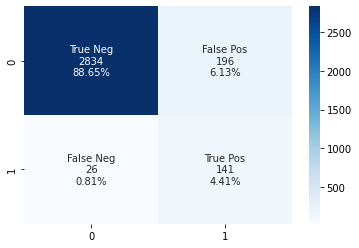

In [77]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [81]:
#Using logistic regression as before with parameters penalty='elasticnet,C=100 and solver = 'newton-cg'
#Bag of words
classifier = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr', class_weight='balanced', C=0.1)
classifier.fit(bow_df , y_train)
prediction=classifier.predict(bow_df2)
#model_score = accuracy_score(y_train, prediction)
model_score = accuracy_score(y_test, prediction)
class_report=classification_report(y_test, prediction)
# Print the accuracy report, scores and confusion matrix
print("Logistic Regression using all the features:")
print("Accuracy:","\n", model_score)
print("Accuracy report:","\n", class_report)
print("Confusion Matrix:","\n", confusion_matrix(y_test, prediction))

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression using all the features:
Accuracy: 
 0.945573975602127
Accuracy report: 
               precision    recall  f1-score   support

          no       0.99      0.95      0.97      3030
         yes       0.49      0.87      0.63       167

    accuracy                           0.95      3197
   macro avg       0.74      0.91      0.80      3197
weighted avg       0.97      0.95      0.95      3197

Confusion Matrix: 
 [[2877  153]
 [  21  146]]


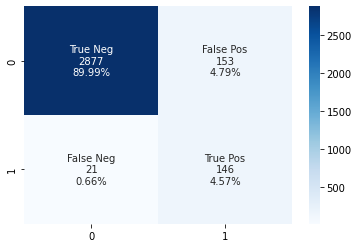

In [82]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [83]:
print(np.shape(prediction))
print(np.shape(y_test))

(3197,)
(3197,)


In [84]:
#using Naive Bayes with smoothing factor value as 1 and make predictionb on test data
#Bag of words
clf = MultinomialNB(alpha=1.0)
clf.fit(bow_df , y_train)
pred = clf.predict(bow_df2)
scores = accuracy_score(y_test, pred)
report=classification_report(y_test, pred)
# Print the accuracy report, scores and confusion matrix
print("Naive Bayes Results will all features:")
print("Accuracy:","\n",scores)
print("Accuracy report:","\n",report)
print("Confusion Matrix:","\n",confusion_matrix(y_test, pred))

Naive Bayes Results will all features:
Accuracy: 
 0.9765405067250548
Accuracy report: 
               precision    recall  f1-score   support

          no       0.98      0.99      0.99      3030
         yes       0.83      0.69      0.75       167

    accuracy                           0.98      3197
   macro avg       0.91      0.84      0.87      3197
weighted avg       0.98      0.98      0.98      3197

Confusion Matrix: 
 [[3007   23]
 [  52  115]]


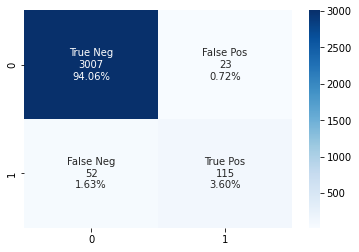

In [85]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [86]:
#using SGD classification
#Bag of words
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
clf_log = SGDClassifier(loss='log').fit(bow_df, y_train)
pred_log = clf_log.predict(bow_df2)
scoresSGD=accuracy_score(y_test, pred_log)
reportSGD=classification_report(y_test, pred_log)
print("SGD Results will all features:")
print("Accuracy:","\n",scoresSGD)
print("Accuracy report:","\n",reportSGD)
# print("Confusion Matrix:","\n",confusion_matrix(y_test, pred_log))

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Results will all features:
Accuracy: 
 0.9480763215514545
Accuracy report: 
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      3030
         yes       0.67      0.01      0.02       167

    accuracy                           0.95      3197
   macro avg       0.81      0.51      0.50      3197
weighted avg       0.93      0.95      0.92      3197



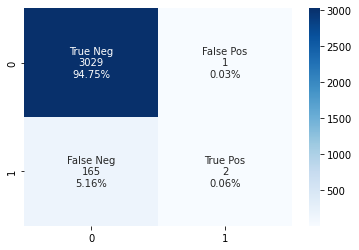

In [87]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_log)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [88]:
#Using logistic regression as before with parameters Penalty 'l2', solver 'lbfgs' and multi_class as 'ovr'
#set the parameter class_weight as 'balanced'
#tfidf
classifier = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='ovr',class_weight='balanced')
classifier.fit(tfidf_df , y_train)
prediction=classifier.predict(tfidf_df2)
model_score = accuracy_score(y_test, prediction)
class_report=classification_report(y_test, prediction)
# Print the accuracy report, scores and confusion matrix
print("Logistic Regression using all the features:")
print("Accuracy:","\n", model_score)
print("Accuracy report:","\n", class_report)
print("Confusion Matrix:","\n", confusion_matrix(y_test, prediction))

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression using all the features:
Accuracy: 
 0.8145136065060995
Accuracy report: 
               precision    recall  f1-score   support

          no       0.97      0.83      0.89      3030
         yes       0.16      0.59      0.25       167

    accuracy                           0.81      3197
   macro avg       0.57      0.71      0.57      3197
weighted avg       0.93      0.81      0.86      3197

Confusion Matrix: 
 [[2505  525]
 [  68   99]]


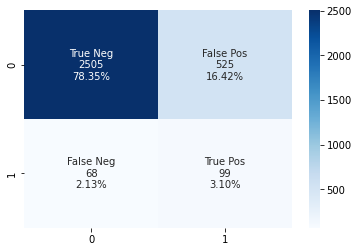

In [89]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [90]:
#tfidf
clf = MultinomialNB(alpha=1.0)
clf.fit(tfidf_df , y_train)
pred = clf.predict(tfidf_df2)
scores = accuracy_score(y_test, pred)
report=classification_report(y_test, pred)
# Print the accuracy report, scores and confusion matrix
print("Naive Bayes Results with all features:")
print("Accuracy:","\n",scores)
print("Accuracy report:","\n",report)
print("Confusion Matrix:","\n",confusion_matrix(y_test, pred))

Naive Bayes Results with all features:
Accuracy: 
 0.9020957147325618
Accuracy report: 
               precision    recall  f1-score   support

          no       0.95      0.95      0.95      3030
         yes       0.07      0.07      0.07       167

    accuracy                           0.90      3197
   macro avg       0.51      0.51      0.51      3197
weighted avg       0.90      0.90      0.90      3197

Confusion Matrix: 
 [[2872  158]
 [ 155   12]]


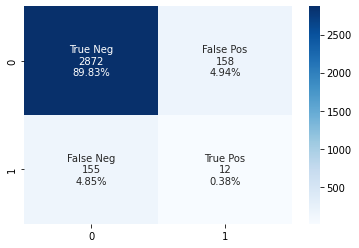

In [91]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [92]:
#SGD tf-idf
clf_log2 = SGDClassifier(loss='log').fit(tfidf_df, y_train)
pred_tf = clf_log2.predict(tfidf_df2)
scoresSGD=accuracy_score(y_test, pred_tf)
reportSGD=classification_report(y_test, pred_tf)
print("SGD Results will all features:")
print("Accuracy:","\n",scoresSGD)
print("Accuracy report:","\n",reportSGD)

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Results will all features:
Accuracy: 
 0.9477635283077885
Accuracy report: 
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      3030
         yes       0.00      0.00      0.00       167

    accuracy                           0.95      3197
   macro avg       0.47      0.50      0.49      3197
weighted avg       0.90      0.95      0.92      3197



c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

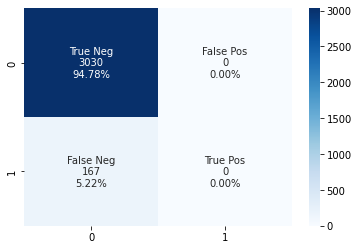

In [93]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_tf)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

Vectorization

In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

x_train_vec = df['all_info'].apply(preprocess)
x_test_vec = df2['all_info'].apply(preprocess)

In [95]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

x_train_vec = df['all_info'].apply(preprocess)
x_test_vec = df2['all_info'].apply(preprocess)

In [96]:
from gensim.models import Word2Vec

sentences_train = [sentence.split() for sentence in x_train_vec]
w2v_model = Word2Vec(sentences_train, vector_size=100, window=5, min_count=5, workers=4)

In [97]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

x_train_vec = np.array([vectorize(sentence) for sentence in x_train_vec])
x_test_vec = np.array([vectorize(sentence) for sentence in x_test_vec])

In [98]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train_vec, y_train)

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(x_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred, pos_label='yes'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='yes'))

Accuracy: 0.9590240850797622
Precision: 0.7571428571428571
Recall: 0.31736526946107785
F1 score: 0.44725738396624476


In [100]:
classifier = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='ovr',class_weight='balanced')
classifier.fit(x_train_vec , y_train)
prediction=classifier.predict(x_test_vec)
#model_score = accuracy_score(y_train, prediction)
model_score = accuracy_score(y_test, prediction)
class_report=classification_report(y_test, prediction)
# Print the accuracy report, scores and confusion matrix
print("Logistic Regression using all the features:")
print("Accuracy:","\n", model_score)
print("Accuracy report:","\n", class_report)
print("Confusion Matrix:","\n", confusion_matrix(y_test, prediction))

Logistic Regression using all the features:
Accuracy: 
 0.8551767281826712
Accuracy report: 
               precision    recall  f1-score   support

          no       0.99      0.86      0.92      3030
         yes       0.24      0.84      0.38       167

    accuracy                           0.86      3197
   macro avg       0.62      0.85      0.65      3197
weighted avg       0.95      0.86      0.89      3197

Confusion Matrix: 
 [[2594  436]
 [  27  140]]


c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


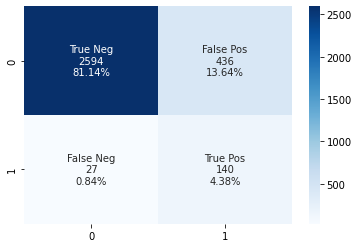

In [101]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()

In [102]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

clf_log2 = SGDClassifier(loss='log').fit(x_train_vec, y_train)
pred_tf = clf_log2.predict(x_test_vec)
scoresSGD=accuracy_score(y_test, pred_tf)
reportSGD=classification_report(y_test, pred_tf)
print("SGD Results will all features:")
print("Accuracy:","\n",scoresSGD)
print("Accuracy report:","\n",reportSGD)

SGD Results will all features:
Accuracy: 
 0.9574601188614326
Accuracy report: 
               precision    recall  f1-score   support

          no       0.96      1.00      0.98      3030
         yes       0.78      0.26      0.39       167

    accuracy                           0.96      3197
   macro avg       0.87      0.63      0.68      3197
weighted avg       0.95      0.96      0.95      3197



c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


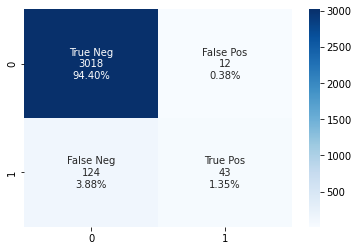

In [103]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_tf)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()